In [1]:
import cv2
import numpy as np

In [49]:
img_np = np.ones([5, 5])

print(img_np)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [41]:
kernel = np.array([-1, 0, 1])

print(kernel)

[-1  0  1]


In [50]:
# 디지털 신호처리의 FIR 필터 한 번 살펴보면 좋음
# cv2는 OpenCV라는 C++로 작성된 라이브러리를 python 가져다 사용
# 그러므로 python의 행렬 정보를 OpenCV용으로 변환할 필요가 있음
# 목적: 타입 컨버팅
img_cv = cv2.resize(img_np, (5, 5))

print(img_cv)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [43]:
kernel = cv2.resize(kernel, (1, 3))

print(kernel)

[[-1]
 [ 0]
 [ 1]]


In [51]:
img_cv[0][0] = 0
img_cv[2][2] = 2
img_cv[4][4] = 3

print(img_cv)

[[0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 3.]]


In [19]:
# filter2D - Convolution이
# 결국 라플라스 변환과 푸리에 변환에 관계를 가지고 있기 때문
# 푸리에 변환이 완료된 두 함수의 곱은 시간 영역에서 컨벌루션과 동일하다.
# 주파수 영역으로 변환한 두 함수의 곱이 시간 영역에서 컨벌루션과 동일하다.
# (증명: 자코비안 행렬과 라플라스 변환이 필요함)
# FIR 필터의 가장 기본 근간
conv_test = cv2.filter2D(img_cv, -1, kernel)

print(conv_test)

[[ 0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  2.]
 [ 0.  0.  0.  0.  0.]]


In [56]:
import copy

# 포인터를 공유 -> malloc을 통해 해결(C, C++ 관점)
# 객체를 공유 -> new를 통해 해결(자바 관점)
# 파이썬에서 위의 역할을 해주는 것이 copy.deepcopy()
def filter_2d(input_img, kernel):
    input_img = copy.deepcopy(input_img)
    output_img = copy.deepcopy(input_img)
    
    #print('input_img.shape[0]:', input_img.shape[0])
    #print('input_img.shape[1]:', input_img.shape[1])
    
    #for i in range(input_img.shape[0]):
    #    print(input_img[i])
        
    # 컨벌루션 연산이 적용되는 대상은 무엇인가 ? 답: 이미지
    # 이미지 -> (다차원)행렬
    for row in range(input_img.shape[0]):
        output_img[row][0] = input_img[row][1] * kernel[0] + \
                        input_img[row][0] * kernel[1] + \
                        input_img[row][1] * kernel[2]
        
        for col in range(1, input_img.shape[1] - 1):
            output_img[row][col] = input_img[row][col - 1] * kernel[0] + \
                        input_img[row][col] * kernel[1] + \
                        input_img[row][col + 1] * kernel[2]
            
        output_img[row][input_img.shape[1] - 1] = \
            input_img[row][input_img.shape[1] - 2] * kernel[0] + \
            input_img[row][input_img.shape[1] - 1] * kernel[1] + \
            input_img[row][input_img.shape[1] - 2] * kernel[2]
            
    return output_img.T

In [58]:
conv_img = filter_2d(img_cv, kernel)
conv_img2 = cv2.filter2D(img_cv, -1, kernel)

print(conv_img)
print(conv_img == conv_img2)

[[ 0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  2.]
 [ 0.  0.  0.  0.  0.]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [59]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [60]:
classifier = VGG16()

553467904/553467096 [==============================] - 250s 0us/step


In [61]:
classifier.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [90]:
# 이미지를 로드 해주는데 크기값을 (224, 224)라고 알려주면서 로드한다.
suitImg = image.load_img("suit.jpg", target_size=(224, 224))

In [91]:
# img_to_array를 통해서 Image 데이터를 numpy 형식으로 만들어준다.
# 그래야 파이썬의 numpy 기능들을 활용할 수 있다.
transformed_img = image.img_to_array(suitImg)
print(transformed_img.shape)
print(transformed_img)

(224, 224, 3)
[[[87. 79. 58.]
  [92. 82. 57.]
  [95. 83. 59.]
  ...
  [61. 17.  4.]
  [61. 22.  5.]
  [64. 27.  9.]]

 [[86. 78. 57.]
  [91. 81. 56.]
  [94. 82. 58.]
  ...
  [68. 23.  4.]
  [70. 29.  7.]
  [68. 30.  7.]]

 [[86. 78. 57.]
  [89. 79. 54.]
  [94. 82. 58.]
  ...
  [63. 25.  6.]
  [65. 29.  7.]
  [59. 26.  7.]]

 ...

 [[33. 34. 29.]
  [39. 35. 32.]
  [39. 34. 31.]
  ...
  [28. 14. 11.]
  [26. 12.  9.]
  [31. 13. 11.]]

 [[34. 30. 27.]
  [37. 36. 32.]
  [37. 32. 29.]
  ...
  [ 2.  6.  9.]
  [ 3.  7. 10.]
  [ 3.  8. 11.]]

 [[36. 32. 29.]
  [34. 35. 30.]
  [38. 33. 30.]
  ...
  [41. 43. 42.]
  [39. 41. 40.]
  [44. 39. 36.]]]


In [73]:
# (224, 224, 3) 형태의 텐서 -> expand_dims()을 통해서 차원이 하나 더 확장된다.
# VGGNet에 집어넣을때 아래와 같은 형식을 취해서 넣어야만한다.
transformed_img = np.expand_dims(transformed_image, axis = 0)
print(transformed_img.shape)
print(transformed_img)

(1, 224, 224, 3)
[[[[ -36.68      -37.779     -45.939003]
   [ -31.68      -34.779     -46.939003]
   [ -28.68      -33.779     -44.939003]
   ...
   [ -62.68      -99.779     -99.939   ]
   [ -62.68      -94.779     -98.939   ]
   [ -59.68      -89.779     -94.939   ]]

  [[ -37.68      -38.779     -46.939003]
   [ -32.68      -35.779     -47.939003]
   [ -29.68      -34.779     -45.939003]
   ...
   [ -55.68      -93.779     -99.939   ]
   [ -53.68      -87.779     -96.939   ]
   [ -55.68      -86.779     -96.939   ]]

  [[ -37.68      -38.779     -46.939003]
   [ -34.68      -37.779     -49.939003]
   [ -29.68      -34.779     -45.939003]
   ...
   [ -60.68      -91.779     -97.939   ]
   [ -58.68      -87.779     -96.939   ]
   [ -64.68      -90.779     -96.939   ]]

  ...

  [[ -90.68      -82.779     -74.939   ]
   [ -84.68      -81.779     -71.939   ]
   [ -84.68      -82.779     -72.939   ]
   ...
   [ -95.68     -102.779     -92.939   ]
   [ -97.68     -104.779     -94.939   ]

In [74]:
# 전처리는 실질적으로 이미지를 처리할 때 기본적으로 적용하는
# GrayScale이라든지, 가우시안 블러등을 자동으로 처리해준다.
# 영상을 본격적으로 분석하기 전에 필수적으로 앞단에서 공통적으로 해주는 작업들을 자동으로 해준다.
transformed_img = preprocess_input(transformed_img)
print(transformed_img.shape)
print(transformed_img)

(1, 224, 224, 3)
[[[[-149.878 -154.558 -160.36 ]
   [-150.878 -151.558 -155.36 ]
   [-148.878 -150.558 -152.36 ]
   ...
   [-203.878 -216.558 -186.36 ]
   [-202.878 -211.558 -186.36 ]
   [-198.878 -206.558 -183.36 ]]

  [[-150.878 -155.558 -161.36 ]
   [-151.878 -152.558 -156.36 ]
   [-149.878 -151.558 -153.36 ]
   ...
   [-203.878 -210.558 -179.36 ]
   [-200.878 -204.558 -177.36 ]
   [-200.878 -203.558 -179.36 ]]

  [[-150.878 -155.558 -161.36 ]
   [-153.878 -154.558 -158.36 ]
   [-149.878 -151.558 -153.36 ]
   ...
   [-201.878 -208.558 -184.36 ]
   [-200.878 -204.558 -182.36 ]
   [-200.878 -207.558 -188.36 ]]

  ...

  [[-178.878 -199.558 -214.36 ]
   [-175.878 -198.558 -208.36 ]
   [-176.878 -199.558 -208.36 ]
   ...
   [-196.878 -219.558 -219.36 ]
   [-198.878 -221.558 -221.36 ]
   [-196.878 -220.558 -216.36 ]]

  [[-180.878 -203.558 -213.36 ]
   [-175.878 -197.558 -210.36 ]
   [-178.878 -201.558 -210.36 ]
   ...
   [-198.878 -227.558 -245.36 ]
   [-197.878 -226.558 -244.36 ]
   [-

In [70]:
# 현재 classifier가 VGGNet을 대표하므로
# 해당 신경망을 통해서 현재 들어온 이미지에 대해 예측하도록 한다.
pred = classifier.predict(transformed_img)
print(pred)

[[4.57728788e-07 5.69925156e-08 2.04072261e-08 4.86383867e-09
  4.45801973e-08 2.35339552e-08 3.75785936e-09 7.55300425e-06
  1.57011584e-06 2.88043385e-08 3.36369084e-08 9.81230741e-08
  1.08910641e-07 7.39402850e-08 4.10530667e-08 3.60009231e-08
  8.33654425e-08 3.38250430e-07 9.79653336e-08 1.14039779e-07
  5.74555088e-08 1.42231698e-07 2.13440359e-07 3.72899990e-07
  2.95708134e-07 2.43355736e-08 8.53719762e-09 1.60302545e-08
  2.38307205e-08 2.22977832e-08 5.11068388e-09 2.94454274e-08
  1.83023428e-08 2.46406149e-08 2.25938237e-08 5.19829193e-08
  9.67676002e-08 7.44626689e-08 1.01603197e-08 5.85356688e-08
  1.15023134e-07 9.42422140e-09 2.33318467e-08 2.17850911e-07
  3.87197581e-08 1.03730777e-07 7.33350802e-08 1.19625385e-08
  1.16350698e-07 8.71975914e-08 9.70038556e-08 8.72284147e-07
  1.72524508e-07 1.85783673e-08 1.53970078e-07 1.53373463e-07
  1.62099969e-08 2.63217643e-08 1.17687895e-08 6.64154015e-07
  1.12527357e-06 9.56534478e-08 1.41384973e-07 1.32815160e-06
  1.3770

In [75]:
print(pred.shape)

(1, 1000)


In [77]:
# 라플라스 변환을 하면 s-domain이라는 평면으로 이동을 하게 되고
# 라플라스 역변환을 하면 time-domaim(시간축)으로 돌아오게 된다.
from keras.applications.vgg16 import decode_predictions

# 역으로 변환을 해서 이것이 뭉엇인지를 판정할 수 있게 도와준다.
# 최대값 5개를 뽑으세요 ~
decode_predictions(pred, top = 5)

40960/35363 [==================================] - 0s 0us/step


[[('n04350905', 'suit', 0.8290494),
  ('n04591157', 'Windsor_tie', 0.06311019),
  ('n04479046', 'trench_coat', 0.02156459),
  ('n10148035', 'groom', 0.018631369),
  ('n03594734', 'jean', 0.013046907)]]

In [80]:
label = decode_predictions(pred)

In [82]:
print('%s (%.2f%%)' % (label[0][0][1], label[0][0][2] * 100))

suit (82.90%)


In [83]:
print('%s (%.2f%%)' % (label[0][1][1], label[0][1][2] * 100))

Windsor_tie (6.31%)


In [84]:
print('%s (%.2f%%)' % (label[0][2][1], label[0][2][2] * 100))

trench_coat (2.16%)


In [89]:
print('top 5!')

for i in range(5):
    print('%16s (%.2f%%)' % (label[0][i][1], label[0][i][2] * 100))

top 5!
            suit (82.90%)
     Windsor_tie (6.31%)
     trench_coat (2.16%)
           groom (1.86%)
            jean (1.30%)


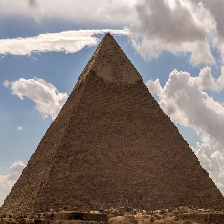

In [93]:
test_img = image.load_img("pyramid.jpg", target_size = (224, 224))
test_img

In [97]:
trans_img = image.img_to_array(test_img)
print(trans_img.shape)

(224, 224, 3)


In [98]:
trans_img = np.expand_dims(trans_img, axis = 0)
print(trans_img.shape)

(1, 224, 224, 3)


In [99]:
trans_img = preprocess_input(trans_img)
print(trans_img.shape)

(1, 224, 224, 3)


In [100]:
pred = classifier.predict(trans_img)

In [101]:
label = decode_predictions(pred)

print('top 5!')

for i in range(5):
    print('%16s (%.2f%%)' % (label[0][i][1], label[0][i][2] * 100))

top 5!
            barn (27.79%)
          church (25.31%)
       bell_cote (13.50%)
         obelisk (7.41%)
             alp (5.21%)


In [103]:
# 마지막 레이어를 제거하여 추가적인 네트워크 구성이 가능하게 만든다.
last_layer = str(classifier.layers[-1])

In [105]:
import keras

from keras.layers import Dense

In [106]:
# 추가할 신규 레이어를 작성하는 파트
new_layer = keras.Sequential()

for layer in classifier.layers:
    if str(layer) != last_layer:
        new_layer.add(layer)
        
new_layer.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [ ]:
#권순규, 전보경, 전지연, 박진희
#김경완, 문종후, 양대민, 이지하
#김민창, 김재용, 백주미, 유영돈
#김병준, 김유정, 옥수민, 최민근
#이강산, 이민호, 이우영, 이진호
#이승준, 장민철, 정희건, 조동준

#6 - 영돈, 2 - 주미, 1 - 민창, 11 - 재용
#21 - 순규, 보경, 지연, 진희
#20 - 강산, 민호, 우영, 진호
#3 - 경완, 종후, 대민, 지하
#7 - 병준, 유정, 수민, 민근
#14 - 승준, 민철, 희건, 동준

# *   *
#20  10       21   22   23   24
#15  16            17   18   19
#    11x           12   13   14
#     6x            7    8    9
#1x   2x            3    4    5
#----------------------------------
#교탁